<a href="https://colab.research.google.com/github/Devesh946/AI_df20555/blob/main/Lab8/Lab8_datafine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
!unzip data.zip

--2021-05-04 23:13:53--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M  48.3MB/s    in 0.4s    

2021-05-04 23:13:54 (48.3 MB/s) - ‘data.zip’ saved [20194537/20194537]

Archive:  data.zip
   creating: data/
   creating: data/cats/
  inflating: data/cats/cat.1.jpg     
  inflating: data/cats/cat.10.jpg    
  inflating: data/cats/cat.100.jpg   
  inflating: data/cats/cat.101.jpg   
  inflating: data/cats/cat.102.jpg   
  inflating: data/cats/cat.103.jpg   
  inflating: data/cats/cat.104.jpg   
  inflating: data/cats/cat.105.jpg   
  inflating: data/cats/cat.106.jpg   
  infl

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
image_generator = ImageDataGenerator(rescale=1.0/255, 
                               rotation_range=20,
                               horizontal_flip=True, 
                               validation_split=0.1)

In [4]:
train_data = image_generator.flow_from_directory('./data/', target_size=(304,329),
                                      batch_size=4,subset='training')

val_data = image_generator.flow_from_directory('./data/', target_size=(304,329),
                                      batch_size=4,subset='validation')

Found 728 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

image_size = [304,329,3]

In [6]:
input = Input(shape = image_size)
model = ResNet50V2(input_tensor=input,)

102875136/102869336 [==============================] - 1s 0us/step


In [7]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 304, 329, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 310, 335, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 152, 165, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 154, 167, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [10]:
last_layer = model.get_layer('post_relu').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)
model = Model(input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 304, 329, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 310, 335, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 152, 165, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 154, 167, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="accuracy")
my_callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='xception_model.h5', save_best_only=True),
]

model.fit(train_data, validation_data=val_data, epochs=50, callbacks=my_callbacks)

Epoch 1/50
182/182 [==============================] - 273s 1s/step - loss: 2.7983 - accuracy: 0.8379 - val_loss: 1.0069 - val_accuracy: 0.9625
Epoch 2/50
182/182 [==============================] - 267s 1s/step - loss: 2.1742 - accuracy: 0.9598 - val_loss: 0.1043 - val_accuracy: 0.9875
Epoch 3/50
182/182 [==============================] - 264s 1s/step - loss: 0.6278 - accuracy: 0.9798 - val_loss: 0.1911 - val_accuracy: 0.9875
Epoch 4/50
182/182 [==============================] - 265s 1s/step - loss: 0.2775 - accuracy: 0.9891 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
182/182 [==============================] - 266s 1s/step - loss: 0.4044 - accuracy: 0.9846 - val_loss: 1.8271 - val_accuracy: 0.9375
Epoch 6/50
182/182 [==============================] - 273s 2s/step - loss: 0.2596 - accuracy: 0.9914 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
182/182 [==============================] - 269s 1s/step - loss: 1.1841 - accuracy: 0.9720 - val_loss: 0.3730 - val_accuracy

KeyboardInterrupt: ignored

In [12]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.735241,0.906593,1.006907,0.9625
1,2.053405,0.960165,0.104275,0.9875
2,0.850764,0.976648,0.191111,0.9875
3,0.256087,0.987637,0.000000,1.0000
4,0.498285,0.986264,1.827071,0.9375


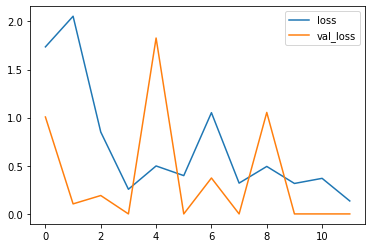

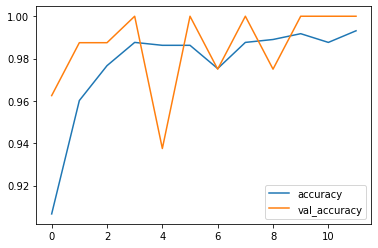

In [13]:
history[['loss', 'val_loss']].plot()
history[['accuracy','val_accuracy']].plot()